In [342]:
"""
Created on Tue Nov  5 17:21:43 2024

simple program to check a possible mechanism leading to growing amplitudes

=> Indeed, first cooling followed by emittance growth seen with simple model

=> think of the problem in terms of eigenvalues of a 6x6 transfer matrix of all
   three particles!!
"""

'\nCreated on Tue Nov  5 17:21:43 2024\n\nsimple program to check a possible mechanism leading to growing amplitudes\n\n=> Indeed, first cooling followed by emittance growth seen with simple model\n\n=> think of the problem in terms of eigenvalues of a 6x6 transfer matrix of all\n   three particles!!\n'

In [447]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [424]:
nturns       = 200
muPUK, muKPU = 1.51, 2*np.pi*1.89 - 1.51
gainK        = 0.12
gainPU       = 0.

In [425]:
matPUK11, matPUK12, matPUK21, matPUK22 = np.cos(muPUK), np.sin(muPUK), -np.sin(muPUK), np.cos(muPUK)
matKPU11, matKPU12, matKPU21, matKPU22 = np.cos(muKPU), np.sin(muKPU), -np.sin(muKPU), np.cos(muKPU)

In [426]:
#rng = np.random.default_rng(18022002)
#rng = np.random.default_rng(22072005)
rng = np.random.default_rng()
fct = 0.0  # to be able to switch between two cases (fct = 0 the interesting one)!!

In [427]:
# now do simulation - generation of three particles followed by tracking over nturns turns
xb, xpb = [rng.normal(0, 1)], [rng.normal(0, 1)]
xg, xpg = [rng.normal(0, 1)], [rng.normal(0, 1)]
xo, xpo = [rng.normal(0, 1)], [rng.normal(0, 1)]
print('in loop over cases')
for turn in range(1, nturns + 1):
    # first get phase space coordinates out pf kicker
    xbK  = matPUK11*xb[turn-1] + matPUK12*xpb[turn-1]
    xpbK = matPUK21*xb[turn-1] + matPUK22*xpb[turn-1] + gainK*(xb[turn-1] + xg[turn-1] + fct*xo[turn-1])
    xgK  = matPUK11*xg[turn-1] + matPUK12*xpg[turn-1]
    xpgK = matPUK21*xg[turn-1] + matPUK22*xpg[turn-1] + gainK*(xb[turn-1] + xg[turn-1] + xo[turn-1])
    xoK  = matPUK11*xo[turn-1] + matPUK12*xpo[turn-1]
    xpoK = matPUK21*xo[turn-1] + matPUK22*xpo[turn-1] + gainK*(fct*xb[turn-1] + xg[turn-1] + xo[turn-1])
    # then track further to PU and coordinates to arrays
    xb.append(matKPU11*xbK + matKPU12*xpbK)
    xpb.append(matKPU21*xbK + matKPU22*xpbK)
    xg.append(matKPU11*xgK + matKPU12*xpgK)
    xpg.append(matKPU21*xgK + matKPU22*xpgK)
    xo.append(matKPU11*xoK + matKPU12*xpoK)
    xpo.append(matKPU21*xoK + matKPU22*xpoK)

in loop over cases


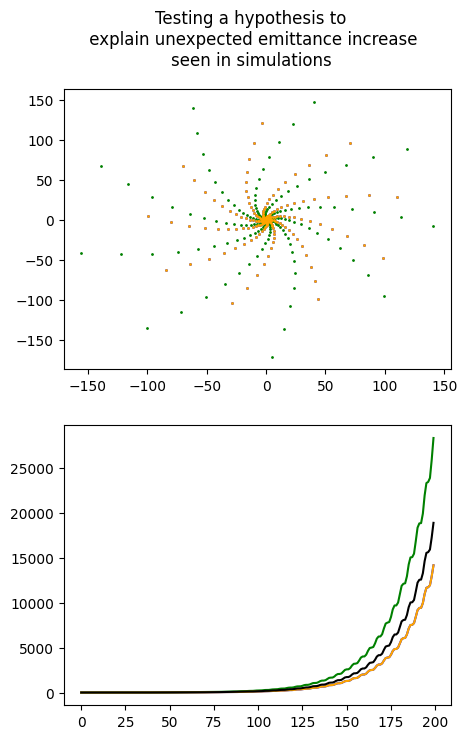

In [428]:
# Some plotting of results
fig1 = plt.figure( figsize=(5., 8.) )
fig1.suptitle('Testing a hypothesis to\n explain unexpected emittance increase\n' +
              'seen in simulations')
ax = fig1.subplots(2, 1) 
ax[0].scatter( xb, xpb, s=1, color = 'blue' )
ax[0].scatter( xg, xpg, s=1, color = 'green' )
ax[0].scatter( xo, xpo, s=1, color = 'orange' )
ax[1].plot( [ xb[ind]**2 + xpb[ind]**2 for ind in range(nturns) ], color='blue' )
ax[1].plot( [ xg[ind]**2 + xpg[ind]**2 for ind in range(nturns) ], color='green' )
ax[1].plot( [ xo[ind]**2 + xpo[ind]**2 for ind in range(nturns) ], color='orange' )
ax[1].plot( [(xb[ind]**2 + xpb[ind]**2 + xo[ind]**2 + xpo[ind]**2 + 
              xg[ind]**2 + xpg[ind]**2)/3 for ind in range(nturns) ], color='black' )

In [445]:
from scipy.linalg import eig

# Define the 6x6 transfer matrix for all particles
transfer_matrix1 = np.zeros((6, 6))

# Phase advance terms from matPUK
# Particle B
transfer_matrix1[0, 0] = matPUK11  # xb -> xb
transfer_matrix1[0, 1] = matPUK12  # xpb -> xb
transfer_matrix1[1, 0] = matPUK21  # xb -> xpb
transfer_matrix1[1, 1] = matPUK22  # xpb -> xpb

# Particle G
transfer_matrix1[2, 2] = matPUK11  # xg -> xg
transfer_matrix1[2, 3] = matPUK12  # xpg -> xg
transfer_matrix1[3, 2] = matPUK21  # xg -> xpg
transfer_matrix1[3, 3] = matPUK22  # xpg -> xpg

# Particle O
transfer_matrix1[4, 4] = matPUK11  # xo -> xo
transfer_matrix1[4, 5] = matPUK12  # xpo -> xo
transfer_matrix1[5, 4] = matPUK21  # xo -> xpo
transfer_matrix1[5, 5] = matPUK22  # xpo -> xpo

# Now add feedback terms due to gainK
# These feedback terms represent the coupling interactions

# Feedback for Particle B (xpb')
transfer_matrix1[1, 0] += gainK      # from xb to xpb'
transfer_matrix1[1, 2] += gainK      # from xg to xpb'
transfer_matrix1[1, 4] += gainK * fct  # from xo to xpb' with factor fct
transfer_matrix1[3, 0] += gainK
transfer_matrix1[3, 2] += gainK      # from xg to xpg'
transfer_matrix1[3, 4] += gainK      # from xo to xpg'


# Feedback for Particle O (xpo')
transfer_matrix1[5, 0] += gainK * fct  # from xb to xpo' with factor fct
transfer_matrix1[5, 2] += gainK      # from xg to xpo'
transfer_matrix1[5, 4] += gainK      # from xo to xpo'




transfer_matrix2 = np.array([
    [matKPU11, matKPU12, 0,        0,        0,        0       ],
    [matKPU21, matKPU22, 0,        0,        0,        0       ],
    [0,        0,        matKPU11, matKPU12, 0,        0       ],
    [0,        0,        matKPU21, matKPU22, 0,        0       ],
    [0,        0,        0,        0,        matKPU11, matKPU12],
    [0,        0,        0,        0,        matKPU21, matKPU22]
])

transfer_matrix=transfer_matrix2 @ transfer_matrix1


print(transfer_matrix1)





# Compute eigenvalues of the transfer matrix
eigenvalues, eigenvectors = np.linalg.eig(transfer_matrix)

# Output eigenvalues for analysis
print("Eigenvalues of the 6x6 transfer matrix:", eigenvalues)
print(f"Eigenvectors are{eigenvectors[:2]}")
print(eigenvectors[1][3])

[[ 0.06075888  0.99815247  0.          0.          0.          0.        ]
 [-0.87815247  0.06075888  0.12        0.          0.          0.        ]
 [ 0.          0.          0.06075888  0.99815247  0.          0.        ]
 [ 0.12        0.         -0.87815247  0.06075888  0.12        0.        ]
 [ 0.          0.          0.          0.          0.06075888  0.99815247]
 [ 0.          0.          0.12        0.         -0.87815247  0.06075888]]
Eigenvalues of the 6x6 transfer matrix: [0.79058981+0.65159922j 0.79058981-0.65159922j 0.65349841+0.53270014j
 0.65349841-0.53270014j 0.72204411+0.59906094j 0.72204411-0.59906094j]
Eigenvectors are[[-0.01076525-3.49393685e-01j -0.01076525+3.49393685e-01j
  -0.37991168-1.32803722e-15j -0.37991168+1.32803722e-15j
   0.51447585+3.76117849e-17j  0.51447585-3.76117849e-17j]
 [-0.35750267-3.84846933e-16j -0.35750267+3.84846933e-16j
   0.06974212+3.17495121e-01j  0.06974212-3.17495121e-01j
  -0.03912027-4.83512367e-01j -0.03912027+4.83512367e-01j]]
(

In [450]:
magnitudes_eigenvectors=abs(eigenvectors[0])
print(magnitudes_eigenvectors)
if magnitudes_eigenvectors[0]== magnitudes_eigenvectors[4]:
    print(f"Xb = Xo --> True")
if magnitudes_eigenvectors[0]==(math.sqrt(2)* magnitudes_eigenvectors[4]):
    print(f"Xb = -{math.sqrt(2)}Xg --> True")

[0.34955949 0.34955949 0.37991168 0.37991168 0.51447585 0.51447585]


In [439]:
magnitudes=abs(eigenvalues)
phases = np.angle(eigenvalues)
print(f'Eigenvalues are {eigenvalues}')
print(f'Magnitudes are {magnitudes}')
print(f'Phases are {phases}')

Eigenvalues are [0.79058981+0.65159922j 0.79058981-0.65159922j 0.65349841+0.53270014j
 0.65349841-0.53270014j 0.72204411+0.59906094j 0.72204411-0.59906094j]
Magnitudes are [1.02450661 1.02450661 0.84310712 0.84310712 0.93820131 0.93820131]
Phases are [ 0.68932015 -0.68932015  0.68391157 -0.68391157  0.69257454 -0.69257454]


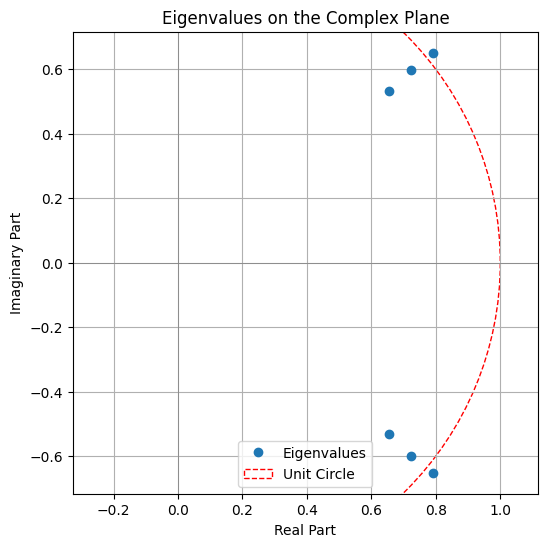

In [431]:
plt.figure(figsize=(6, 6))
plt.plot(np.real(eigenvalues), np.imag(eigenvalues), 'o', label="Eigenvalues")
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label="Unit Circle")
plt.gca().add_artist(unit_circle)
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.legend()
plt.title("Eigenvalues on the Complex Plane")
plt.grid()
plt.axis("equal")
plt.show()

In [432]:
initial_state = np.array([xb[0], xpb[0], xg[0], xpg[0], xo[0], xpo[0]])
projections = np.dot(eigenvectors.T, initial_state)

In [433]:
# Get the magnitude of each projection (absolute value)
projection_magnitudes = np.abs(projections)

# Identify the dominant mode (the one with the largest projection) at the start
dominant_mode_index = np.argmax(projection_magnitudes)
dominant_eigenvalue = eigenvalues[dominant_mode_index]
dominant_projection = projections[dominant_mode_index]

print(f"Dominant Eigenvalue: {dominant_eigenvalue}")
print(f"Dominant Projection Magnitude: {projection_magnitudes[dominant_mode_index]}")

Dominant Eigenvalue: (0.7905898146111535+0.6515992173138853j)
Dominant Projection Magnitude: 1.3283669196519252


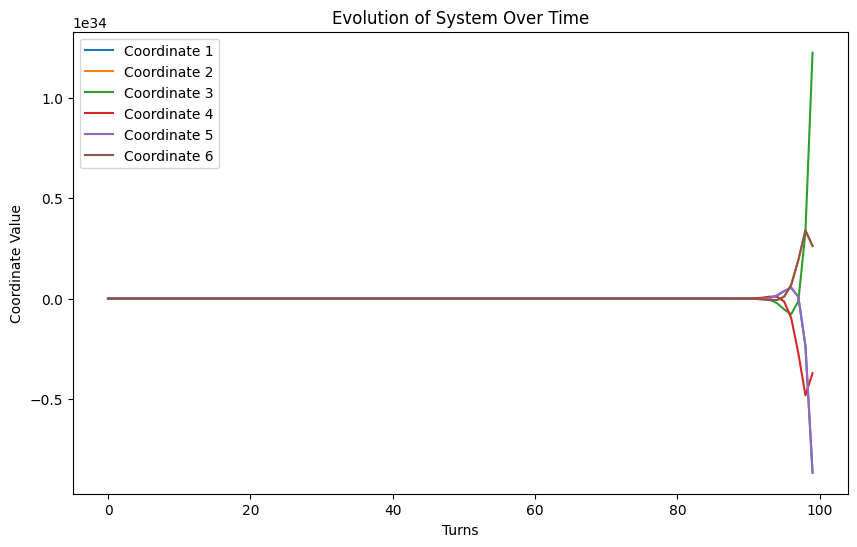

In [434]:
#mode(t)=projection×eλt

evolution = np.zeros((6, nturns), dtype=complex)  # Store the evolution of each state over time

# Track the evolution of each mode based on its eigenvalue for the first turns
for turn in range(100):
    for i, eigenvalue in enumerate(eigenvalues):
        # Mode contribution evolves as projection * e^(lambda * turn)
        mode_contribution = projections[i] * np.exp(eigenvalue * turn)
        
        # Update the state by adding the contribution of each mode (e.g., xb, xpb, xg, xpg, xo, xpo)
        # Since the eigenvectors are the modes, we accumulate them
        evolution[:, turn] += eigenvectors[:, i] * mode_contribution

# You can plot the evolution of each coordinate (position/momentum) for each particle
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(range(100), np.real(evolution[i, :100]), label=f'Coordinate {i+1}')
plt.xlabel('Turns')
plt.ylabel('Coordinate Value')
plt.legend()
plt.title('Evolution of System Over Time')
plt.show()

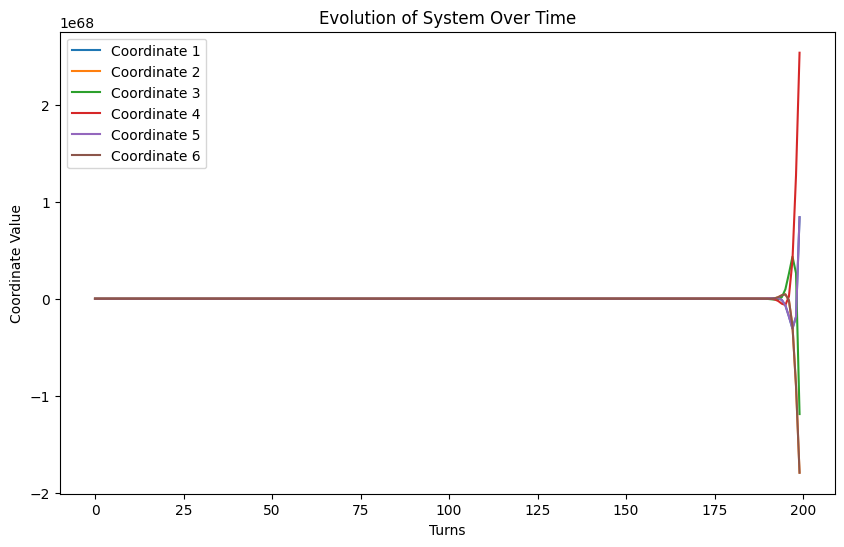

In [435]:
#mode(t)=projection×eλt

evolution = np.zeros((6, nturns), dtype=complex)  # Store the evolution of each state over time

# Track the evolution of each mode based on its eigenvalue
for turn in range(nturns):
    for i, eigenvalue in enumerate(eigenvalues):
        # Mode contribution evolves as projection * e^(lambda * turn)
        mode_contribution = projections[i] * np.exp(eigenvalue * turn)
        
        # Update the state by adding the contribution of each mode (e.g., xb, xpb, xg, xpg, xo, xpo)
        # Since the eigenvectors are the modes, we accumulate them
        evolution[:, turn] += eigenvectors[:, i] * mode_contribution

# You can plot the evolution of each coordinate (position/momentum) for each particle
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(range(nturns), np.real(evolution[i, :]), label=f'Coordinate {i+1}')
plt.xlabel('Turns')
plt.ylabel('Coordinate Value')
plt.legend()
plt.title('Evolution of System Over Time')
plt.show()

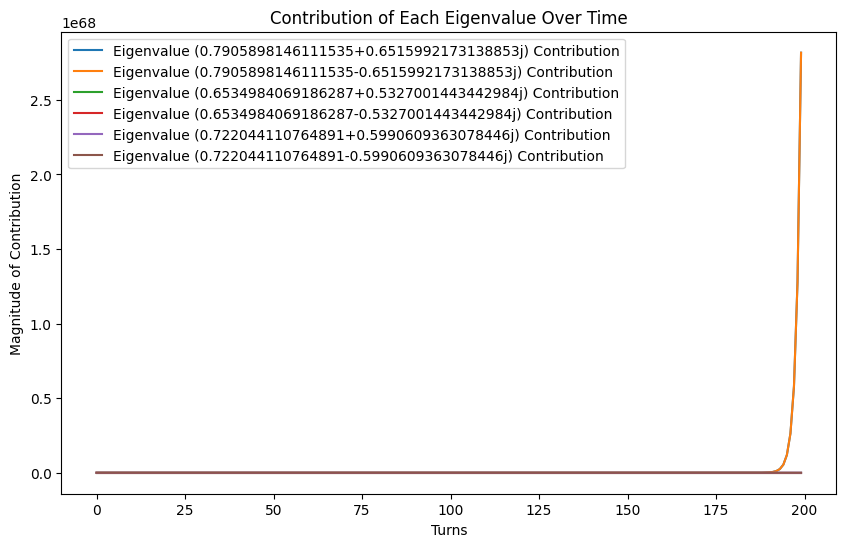

In [436]:
# Track the evolution of each mode and contribution of each eigenvalue
nturns = 200  # Number of turns (or time steps)
contributions = np.zeros((len(eigenvalues), nturns))  # Store the contributions of each eigenvalue over time

# Track the evolution of each mode based on its eigenvalue
for turn in range(nturns):
    for i, eigenvalue in enumerate(eigenvalues):
        # Mode contribution evolves as projection * e^(lambda * turn)
        mode_contribution = projections[i] * np.exp(eigenvalue * turn)
        
        # Store the magnitude of the mode's contribution for each turn
        contributions[i, turn] = np.abs(mode_contribution)  # Absolute value of the contribution

# Step 5: Plot the evolution of the contributions of each eigenvalue over time
plt.figure(figsize=(10, 6))
for i in range(len(eigenvalues)):
    plt.plot(range(nturns), contributions[i, :], label=f'Eigenvalue {eigenvalues[i]} Contribution')

plt.xlabel('Turns')
plt.ylabel('Magnitude of Contribution')
plt.legend()
plt.title('Contribution of Each Eigenvalue Over Time')
plt.show()

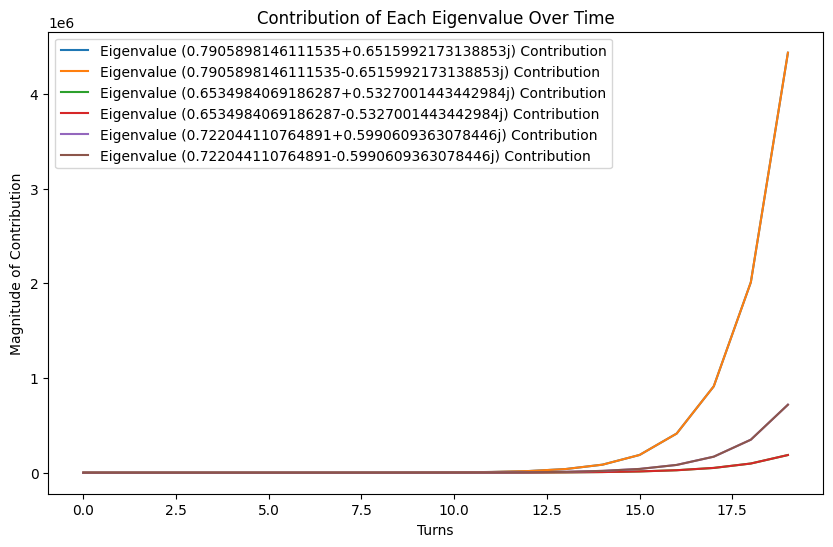

In [437]:
nturns = 20 # Number of turns (or time steps)
contributions = np.zeros((len(eigenvalues), nturns))  # Store the contributions of each eigenvalue over time

# Track the evolution of each mode based on its eigenvalue
for turn in range(nturns):
    for i, eigenvalue in enumerate(eigenvalues):
        # Mode contribution evolves as projection * e^(lambda * turn)
        mode_contribution = projections[i] * np.exp(eigenvalue * turn)
        
        # Store the magnitude of the mode's contribution for each turn
        contributions[i, turn] = np.abs(mode_contribution)  # Absolute value of the contribution

# Step 5: Plot the evolution of the contributions of each eigenvalue over time
plt.figure(figsize=(10, 6))
for i in range(len(eigenvalues)):
    plt.plot(range(nturns), contributions[i, :], label=f'Eigenvalue {eigenvalues[i]} Contribution')

plt.xlabel('Turns')
plt.ylabel('Magnitude of Contribution')
plt.legend()
plt.title('Contribution of Each Eigenvalue Over Time')
plt.show()